In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import keras

In [ ]:
df = pd.read_csv("monthly_milk_production.csv")
print(df.shape)
df.head()


(168, 2)


,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


# 1. EDA and Data Processing

In [ ]:
'''
Checking the duplicate and missing values in the dataset
'''

print(df.duplicated().sum())
print(df.isnull().sum().sum())

0
0


<Axes: xlabel='Date', ylabel='Production'>

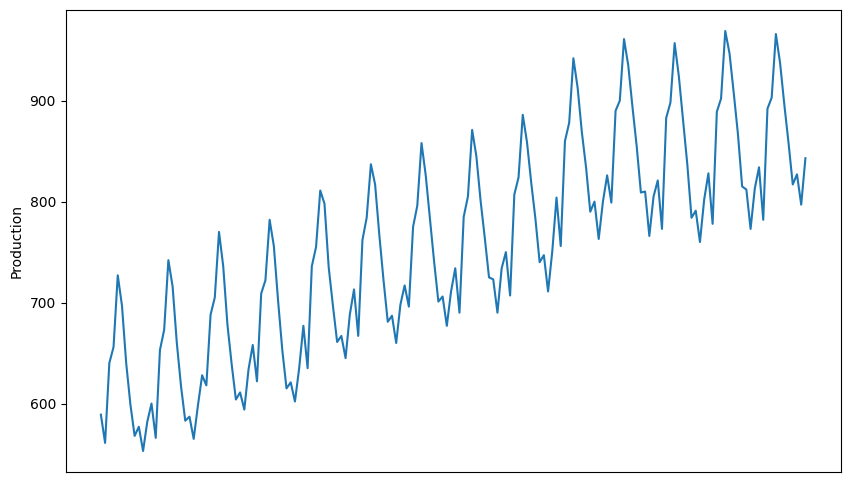

In [ ]:
'''
Plotting the trends withing the production data
'''

plt.figure(figsize=(10, 6))
plt.gca().xaxis.set_visible(False)
sns.lineplot(x="Date", y="Production", data=df)

In [ ]:
df.shape

(168, 2)

In [ ]:
'''
Scaling
'''

min_max = MinMaxScaler()
train = min_max.fit_transform(df[["Production"]][:120])

In [ ]:
'''
Getting the data into the required format with the window size of 10
'''
window_size = 10
x_train=[]
y_train=[]
for i in range(window_size,len(train)):
  x_train.append(train[i-window_size:i,0])
  y_train.append(train[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(110, 10)
(110,)


In [ ]:
'''
np_array.reshape(batch_size, height, width)
'''

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_train.shape

(110, 10, 1)

In [ ]:
x_train

array([[[0.09254499],
        [0.02056555],
        [0.22365039],
        ...,
        [0.11825193],
        [0.03856041],
        [0.06169666]],

       [[0.02056555],
        [0.22365039],
        [0.26478149],
        ...,
        [0.03856041],
        [0.06169666],
        [0.        ]],

       [[0.22365039],
        [0.26478149],
        [0.44730077],
        ...,
        [0.06169666],
        [0.        ],
        [0.07455013]],

       ...,

       [[0.50899743],
        [0.64524422],
        [0.5218509 ],
        ...,
        [0.81233933],
        [0.72236504],
        [0.6092545 ]],

       [[0.64524422],
        [0.5218509 ],
        [0.78920308],
        ...,
        [0.72236504],
        [0.6092545 ],
        [0.63496144]],

       [[0.5218509 ],
        [0.78920308],
        [0.83547558],
        ...,
        [0.6092545 ],
        [0.63496144],
        [0.53984576]]])

# 2. Model Building

RNN

In [ ]:
rnn= tf.keras.models.Sequential()

#### First hidden layer and Input layers
rnn.add(tf.keras.layers.SimpleRNN(units=50,return_sequences=True,input_shape=(10,1)))
rnn.add(tf.keras.layers.Dropout(0.2))
#### Second hidden layer
rnn.add(tf.keras.layers.SimpleRNN(units=50,return_sequences=True))
rnn.add(tf.keras.layers.Dropout(0.2))
#### Third Hidden layer
rnn.add(tf.keras.layers.SimpleRNN(units=50))
#### output layer
rnn.add(tf.keras.layers.Dense(1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
rnn.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.mse)

In [ ]:
history = rnn.fit(x_train,y_train,epochs=20,batch_size=10)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.5413
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1210
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0660
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0915
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0650
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0617
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0502
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0426
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0417
Epoch 10/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0267
Epoch 11/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0203
Epoch 12/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0362
Epoch 13/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0327
Epoch 14/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0270
Epoch 15/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0216
Epoc

In [ ]:
rnn.evaluate(x_train,y_train)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0068 


0.007064959034323692

In [ ]:
test = min_max.transform(df[["Production"]][168 - (48 + 10):])

x_test=[]
y_test=[]
for i in range(window_size,len(test)):
  x_test.append(test[i-window_size:i,0])
  y_test.append(test[i,0])
x_test= np.array(x_test)
y_test= np.array(y_test)

In [ ]:
rnn_pred = rnn.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 369ms/step


In [ ]:
rnn_pred_inverse = min_max.inverse_transform(rnn_pred)

In [ ]:
rnn_pred_inverse.shape

(48, 1)

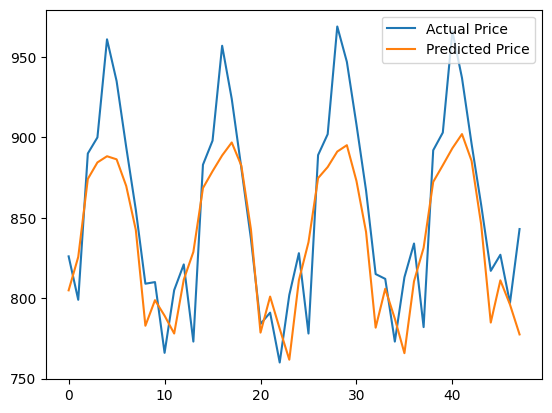

In [ ]:
plt.plot(np.array(df["Production"][120:]),label='Actual Price')
plt.plot(rnn_pred_inverse,label='Predicted Price')
plt.legend()

LSTM

In [ ]:
lstm= tf.keras.models.Sequential()

#### First hidden layer and Input layers
lstm.add(tf.keras.layers.LSTM(units=50,return_sequences=True,input_shape=(10,1)))
lstm.add(tf.keras.layers.Dropout(0.2))
#### Second hidden layer
lstm.add(tf.keras.layers.LSTM(units=50,return_sequences=True))
lstm.add(tf.keras.layers.Dropout(0.2))
#### Third Hidden layer
lstm.add(tf.keras.layers.LSTM(units=50))
#### output layer
lstm.add(tf.keras.layers.Dense(1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
lstm.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.mse)

In [ ]:
history = lstm.fit(x_train,y_train,epochs=20,batch_size=10)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1773
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0516
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0455
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0427
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0382
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0385
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0404
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0374
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0373
Epoch 10/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0370
Epoch 11/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0366
Epoch 12/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0362
Epoch 13/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0406
Epoch 14/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0314
Epoch 15/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0419
Epoc

In [ ]:
lstm.evaluate(x_train,y_train)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0356 


0.03577727451920509

In [ ]:
lstm_pred = lstm.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 438ms/step


In [ ]:
lstm_pred_inverse = min_max.inverse_transform(lstm_pred)

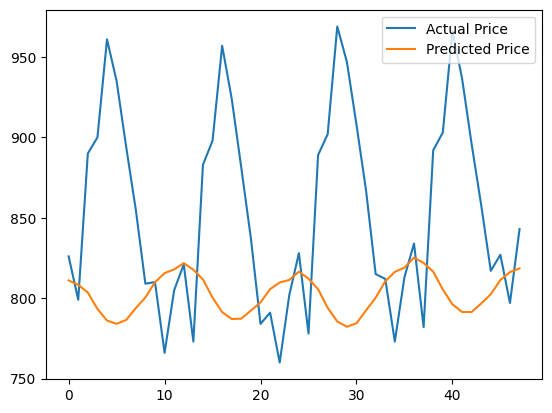

In [ ]:
plt.plot(np.array(df["Production"][120:]),label='Actual Price')
plt.plot(lstm_pred_inverse,label='Predicted Price')
plt.legend()

GRU

In [ ]:
gru= tf.keras.models.Sequential()

#### First hidden layer and Input layers
gru.add(tf.keras.layers.GRU(units=50,return_sequences=True,input_shape=(10,1)))
gru.add(tf.keras.layers.Dropout(0.2))
#### Second hidden layer
gru.add(tf.keras.layers.GRU(units=50,return_sequences=True))
gru.add(tf.keras.layers.Dropout(0.2))
#### Third Hidden layer
gru.add(tf.keras.layers.GRU(units=50))
#### output layer
gru.add(tf.keras.layers.Dense(1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
gru.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.mse)

In [ ]:
history = gru.fit(x_train,y_train,epochs=20,batch_size=10)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0924
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0351
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0346
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0287
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0287
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0273
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0276
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0240
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0240
Epoch 10/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0269
Epoch 11/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0221
Epoch 12/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0195
Epoch 13/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0168
Epoch 14/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0159
Epoch 15/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0143
Epoc

In [ ]:
gru.evaluate(x_train,y_train)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0083 


0.008158989250659943

In [ ]:
gru_pred = gru.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


In [ ]:
gru_pred_inverse = min_max.inverse_transform(gru_pred)

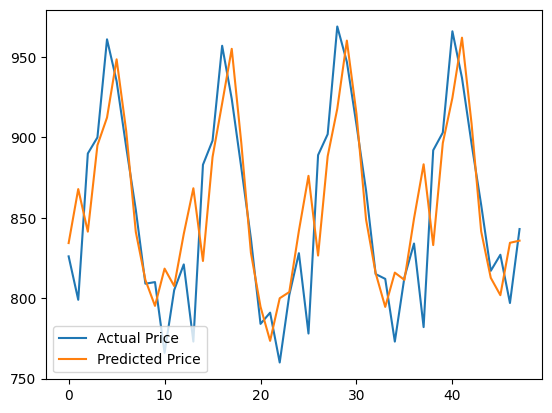

In [ ]:
plt.plot(np.array(df["Production"][120:]),label='Actual Price')
plt.plot(gru_pred_inverse,label='Predicted Price')
plt.legend()